Alejandro Restrepo Giraldo CC: 1001389709

# Laboratorio 8.0

In [2]:
# Librerías 
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tensorflow import keras

2022-08-29 20:14:14.627759: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-29 20:14:14.627823: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Se cargan los datos

In [3]:
data_train= "Curso_aprendizaje_estadistico/Assesment/dataset/train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")
 
data_test= "Curso_aprendizaje_estadistico/Assesment/dataset/test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

In [4]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [5]:
# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]

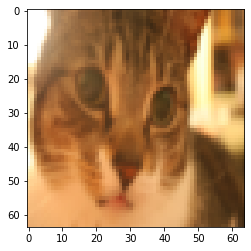

In [6]:
plt.imshow(xtrain[200])

In [7]:
# Se vectorizan los datos
xtrain_ = np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

train_label_ = np.reshape(train_label,209)
test_label_ = np.reshape(test_label,50)

#### Modelo de red neuronal (NN)

In [8]:
#  Topología de la red: [12288, 3, 5, 5, 1] con la función de activación relu y en la
#  última capa la softmax

model = keras.models.Sequential()
model.add(keras.layers.Dense(3, input_dim=12288, activation='relu'))
model.add(keras.layers.Dense(5, activation = 'relu'))
model.add(keras.layers.Dense(5, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'softmax'))

2022-08-29 20:14:27.538936: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-29 20:14:27.539748: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-29 20:14:27.539780: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (usuario-X405UA): /proc/driver/nvidia/version does not exist
2022-08-29 20:14:27.540829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36867     
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36,923
Trainable params: 36,923
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Se especifica la función de coste, el optimizador y la métrica
opt = keras.optimizers.SGD(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/home/usuario/anaconda3/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [11]:
# Se entrena la red neuronal
history = model.fit(xtrain_, train_label_ , validation_data=(xtest_, test_label_),  epochs= 20, verbose=2)

Epoch 1/20
7/7 - 1s - loss: 0.6577 - accuracy: 0.3445 - val_loss: 0.7342 - val_accuracy: 0.6600 - 1s/epoch - 150ms/step
Epoch 2/20
7/7 - 0s - loss: 0.6460 - accuracy: 0.3445 - val_loss: 0.7683 - val_accuracy: 0.6600 - 58ms/epoch - 8ms/step
Epoch 3/20
7/7 - 0s - loss: 0.6343 - accuracy: 0.3445 - val_loss: 0.7413 - val_accuracy: 0.6600 - 58ms/epoch - 8ms/step
Epoch 4/20
7/7 - 0s - loss: 0.6448 - accuracy: 0.3445 - val_loss: 0.7357 - val_accuracy: 0.6600 - 64ms/epoch - 9ms/step
Epoch 5/20
7/7 - 0s - loss: 0.6213 - accuracy: 0.3445 - val_loss: 0.8104 - val_accuracy: 0.6600 - 53ms/epoch - 8ms/step
Epoch 6/20
7/7 - 0s - loss: 0.6218 - accuracy: 0.3445 - val_loss: 0.7852 - val_accuracy: 0.6600 - 63ms/epoch - 9ms/step
Epoch 7/20
7/7 - 0s - loss: 0.6125 - accuracy: 0.3445 - val_loss: 0.7908 - val_accuracy: 0.6600 - 62ms/epoch - 9ms/step
Epoch 8/20
7/7 - 0s - loss: 0.6060 - accuracy: 0.3445 - val_loss: 0.7765 - val_accuracy: 0.6600 - 65ms/epoch - 9ms/step
Epoch 9/20
7/7 - 0s - loss: 0.6027 - acc

Train: 0.344, Test: 0.660


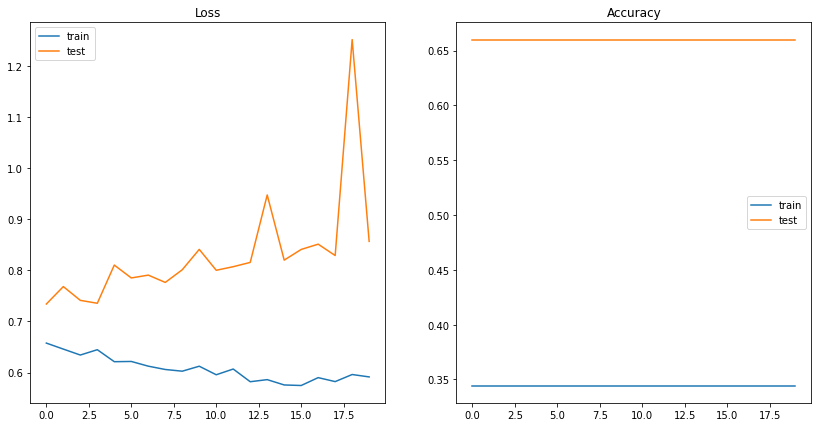

In [12]:
# Evaluación del modelo
_, train_acc = model.evaluate(xtrain_, train_label_, verbose=0)
_, test_acc = model.evaluate(xtest_, test_label_, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Gráficas:
plt.figure(figsize=(14,7))

# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()